In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging, os, pickle, scipy, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy.units as u

In [3]:
logging.getLogger().setLevel('DEBUG')
logging.getLogger('matplotlib').setLevel('DEBUG')
logger = logging.getLogger('main')

In [4]:
from flarestack.shared import name_pickle_output_dir, unblinding_output_path, unbliding_dir, limit_output_path, plot_output_dir
from flarestack.cosmo.icecube_diffuse_flux import get_diffuse_flux_at_100TeV, get_diffuse_flux_at_1GeV
from flarestack.cosmo import get_diffuse_flux_contour
from flarestack.analyses.ccsn import get_sn_color
from flarestack.analyses.ccsn.stasik_2017.pre_trial_pvalues import stasik_pre_trial_pvalues
from flarestack.analyses.ccsn.necker_2019.ccsn_helpers import sn_cats, sn_time_pdfs, sn_times, get_population_flux
from flarestack.analyses.ccsn.necker_2019.ccsn_rate import get_ccsn_rate_type_function
from flarestack.analyses.ccsn.necker_2019.unblinding_scripts.unblind_updated_ccsn import name_root, bkg_ts_root
from flarestack.analyses.ccsn.necker_2019.unblinding_scripts.energy_range.energy_range import energy_range_filename
from flarestack.analyses.ccsn.necker_2019.unblinding_scripts.p_value_distribution.generate_background_pvalue_distribution_single import \
    base_raw, gammas, p_value_filename_single, p_value_directory, p_value_filename

DEBUG:root:logging level is DEBUG
DEBUG:root:logging level is DEBUG


Set unified plotting style

In [81]:
axis_label_fs = 12
axis_ticks_fs = 10
legend_fs = 12
title_fs = 14
figsize = (5.85, 3.6154988341868854)
preliminary_color = 'red'
preliminary_fs = 20
preliminary_txt = 'IceCube\nPreliminary'

Directory for unblinding plots

In [6]:
unblind_ccsn_plot_dir = plot_output_dir(name_root)
logger.info(f'Plots can be found in {unblind_ccsn_plot_dir}')

INFO:main:Plots can be found in /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time


### Calculate pre-trial p-value

DEBUG:main:IIn
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/100/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/100/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIn_box_100.pdf


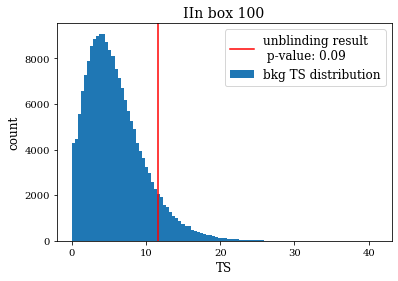

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/300/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/300/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIn_box_300.pdf


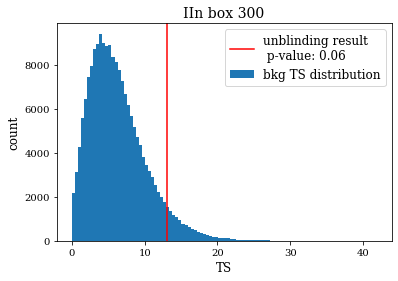

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/1000/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIn/1000/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIn_box_1000.pdf


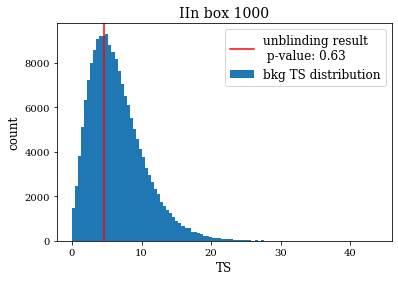

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/7.285/2/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/7.285/2.5/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/7.285/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/7.285/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_tr

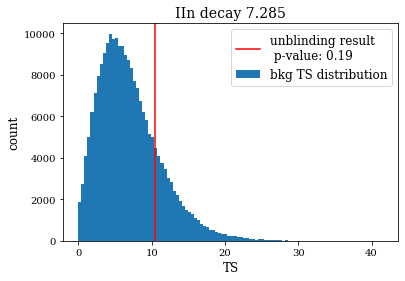

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/72.85000000000001/2/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/72.85000000000001/2.5/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/72.85000000000001/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/72.85000000000001/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analys

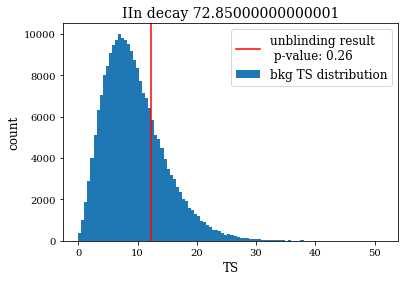

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/728.5/2/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/728.5/2.5/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/728.5/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIn/728.5/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_tr

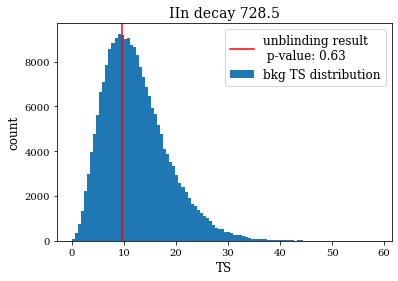

DEBUG:main:IIP
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/100/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/100/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIP_box_100.pdf


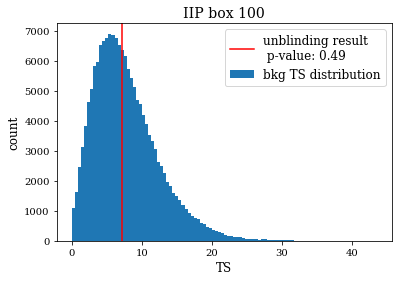

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/300/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/300/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIP_box_300.pdf


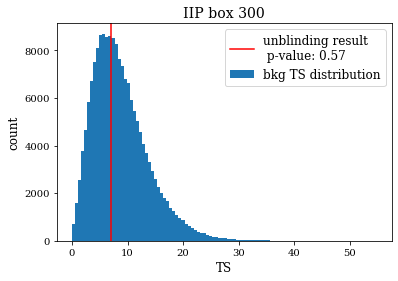

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/1000/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/IIP/1000/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/IIP_box_1000.pdf


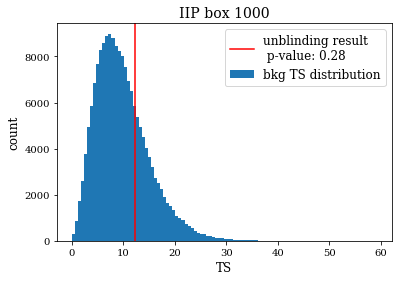

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/7.285/2/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/7.285/2.5/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/7.285/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/7.285/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_tr

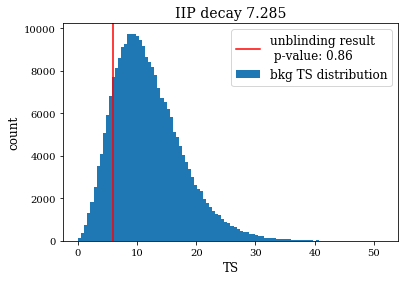

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/72.85000000000001/2.5/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/72.85000000000001/2/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/72.85000000000001/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/72.85000000000001/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analys

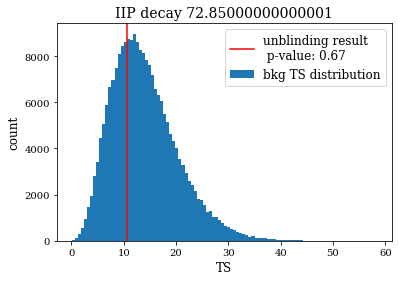

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/728.5/2/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/728.5/2.5/merged/0.pkl
INFO:main:Did not load /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/728.5/2.0/merged/0.pkl: [Errno 2] No such file or directory: '/afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/decay/IIP/728.5/2.0/merged/0.pkl'
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_tr

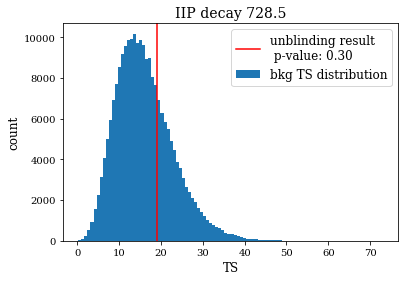

DEBUG:main:Ibc
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/100/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/100/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/Ibc_box_100.pdf


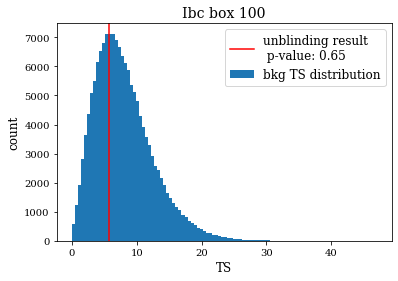

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/300/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/300/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/Ibc_box_300.pdf


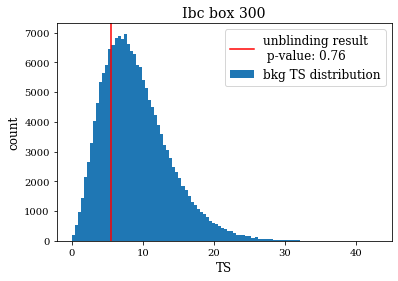

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/1000/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/1000/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/Ibc_box_1000.pdf


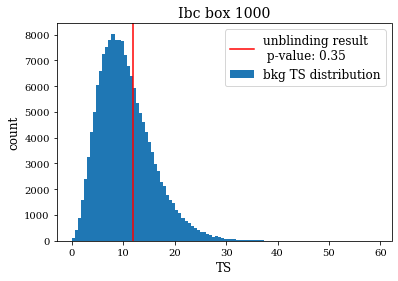

INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/20/2.0/merged/0.pkl
INFO:main:loaded /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/storage/pickles/analyses/ccsn/necker_2019/calculate_sensitivity_ps-v002p03/fit_weights/box/Ibc/20/2.5/merged/0.pkl
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues/Ibc_box_20.pdf


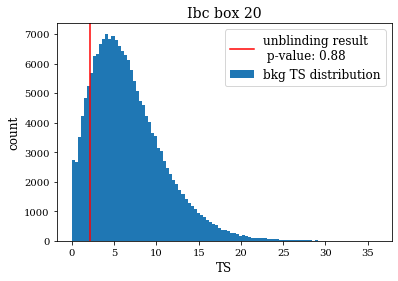

In [7]:
results = list()
columns = np.array([
    'catalogue',
    'box 20',
    'box 100',
    'box 300',
    'box 1000',
    'decay 0.02',
    'decay 0.2',
    'decay 2.0'
])

for cat in sn_cats:

    logger.debug(cat)

    row = np.array([np.nan] * len(columns), dtype=object)
    row[columns == 'catalogue'] = cat

    for pdf_type in sn_times[cat]:

        llh_times = sn_time_pdfs(cat, pdf_type=pdf_type)

        name = f'{name_root}/{pdf_type}/{cat}'
        bkg_ts = f'{bkg_ts_root}/{pdf_type}/{cat}'

        for llh_time in llh_times:

            time = llh_time['decay_time'] if 'decay' in pdf_type else \
                llh_time['pre_window'] + llh_time['post_window']

            full_name = f'{name}/{time}/'
            background_ts = f'{bkg_ts}/{time}/'
            
            # load the background test statistic
            ts_dir = name_pickle_output_dir(background_ts)
            ts_array = list()
            
            for subdir in os.listdir(ts_dir):
                
                merged_pkl = os.path.join(ts_dir, subdir, "merged/0.pkl")
                
                try:
                    with open(merged_pkl, 'rb') as mp:
                        merged_data = pickle.load(mp)
                    logger.info(f'loaded {merged_pkl}')
                except FileNotFoundError as e:
                    logger.info(f'Did not load {merged_pkl}: {e}')
                
                ts_array += list(merged_data['TS'])
                    
            ts_array = np.array(ts_array)
            
            # load the unblinding results
            ub_result_file = unblinding_output_path(full_name + "real_unblind/")
            with open(ub_result_file, 'rb') as f:
                ub_result = pickle.load(f)
                
            ts = ub_result['TS']
            
            p_value = len(ts_array[ts_array >= ts]) / len(ts_array)
            
            nice_time = str(time) if pdf_type == 'box' else str(time / 364.25)
            
            ind_mask = np.array([pdf_type in c for c in columns]) & np.array([c.split(' ')[-1] == nice_time for c in columns])
            row[ind_mask] = p_value
            
            fig, ax = plt.subplots()
            ax.hist(ts_array, label='bkg TS distribution', bins=100)
            ax.axvline(ts, color='red', label=f'unblinding result\n p-value: {p_value:.2f}')
            ax.set_xlabel('TS', fontsize=axis_label_fs)
            ax.set_ylabel('count', fontsize=axis_label_fs)
            ax.set_title(f'{cat} {pdf_type} {time}', fontsize=title_fs)
            ax.tick_params(axis='x', labelsize=axis_ticks_fs)
            ax.tick_params(axis='y', labelsize=axis_ticks_fs)
            ax.legend(fontsize=legend_fs)
            
            filename = os.path.join(unblind_ccsn_plot_dir, 'pre_trial_pvalues',  f"{cat}_{pdf_type}_{time}.pdf")
            d = os.path.dirname(filename)
            if not os.path.isdir(d):
                os.makedirs(d)
            logger.info(f"saving under {filename}")
            fig.savefig(filename)
            
            plt.show()
            plt.close()

    results.append(row)

In [8]:
res = pd.DataFrame(results, columns=columns)
result_filename = os.path.join(unbliding_dir, name_root, 'pre_trial_pvalues.csv')
res.to_csv(result_filename)
logger.info(f'dumped pre trial pvalues to {result_filename}')
res

INFO:main:dumped pre trial pvalues to /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/unblinding_results/analyses/ccsn/necker_2019/unblind_ccsn_box_time/pre_trial_pvalues.csv


,catalogue,box 20,box 100,box 300,box 1000,decay 0.02,decay 0.2,decay 2.0
0,IIn,NaN,0.085179,0.061228,0.631736,0.187427,0.256678,0.626436
1,IIP,NaN,0.486462,0.571598,0.277289,0.859299,0.672736,0.299306
2,Ibc,0.875576,0.648224,0.758390,0.347160,NaN,NaN,NaN


Compare to the result by Alex Stasik

In [9]:
stasik_pre_trial_pvalues

,catalogue,box 20,box 100,box 300,box 1000,decay 0.02,decay 0.2,decay 2.0
0,IIn,NaN,6.4,47.3,50.0,1.6,42.6,50.0
1,IIP,NaN,31.7,50.0,50.0,50.0,50.0,50.0
2,Ibc,50.0,50.0,50.0,34.8,NaN,NaN,NaN


In [41]:
ratio = pd.DataFrame(columns=res.columns)
overf = pd.DataFrame(columns=res.columns)

for i in range(len(res)):
    row = res.loc[i]
    cat = row['catalogue']
    ratio_row = np.array([None] * len(res.columns))
    overf_row = np.array([None] * len(res.columns))
    ratio_row[np.where(ratio.columns == 'catalogue')[0]] = cat
    overf_row[np.where(ratio.columns == 'catalogue')[0]] = cat
    for pdf in row.keys():
        if pdf == 'catalogue':
            continue
        alex = stasik_pre_trial_pvalues.loc[np.where(stasik_pre_trial_pvalues['catalogue'] == cat)[0]][pdf] * .01
        this_res = min((0.5, float(res.loc[np.where(res['catalogue'] == cat)[0]][pdf])))
        r = this_res / alex
        ratio_row[np.where(ratio.columns == pdf)[0]] = r
        
        if not np.isnan(alex.iloc[0]):
            ov = 'this res' if this_res < 0.5 else ''
            if alex.iloc[0] < 0.5:
                ov += ' and alex'
            overf_row[np.where(ratio.columns == pdf)[0]] = ov
        
    ratio = ratio.append(pd.DataFrame([ratio_row], columns=ratio.columns))
    overf = overf.append(pd.DataFrame([overf_row], columns=overf.columns))
    
ratio

,catalogue,box 20,box 100,box 300,box 1000,decay 0.02,decay 0.2,decay 2.0
0,IIn,NaN,1.330928,0.129445,1.000000,11.714184,0.602531,1.000000
0,IIP,NaN,1.534582,1.000000,0.554578,1.000000,1.000000,0.598613
0,Ibc,1.0,1.000000,1.000000,0.997585,NaN,NaN,NaN


In [42]:
overf

,catalogue,box 20,box 100,box 300,box 1000,decay 0.02,decay 0.2,decay 2.0
0,IIn,None,this res and alex,this res and alex,,this res and alex,this res and alex,
0,IIP,None,this res and alex,,this res,,,this res
0,Ibc,,,,this res and alex,None,None,None


### Trial correct pre-trial p-values

Correct the minumm pre-trial p-value with a distribution of minimum p-values

INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/post_trial_minimum_p-value.pdf


0.061227623379167574 0.46766169154228854


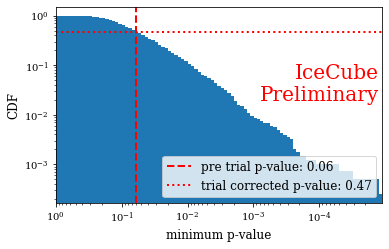

In [82]:
with open(p_value_filename, 'rb') as f:
    pdf_full_res = pickle.load(f)

collected_res = pd.DataFrame()

for pdf_type, full_res in pdf_full_res.items():
    for cat, cat_res in full_res.items():
        for time_key, time_res in cat_res.items():
            p_values = list()
            for gamma, ip_values in time_res.items():
                p_values += ip_values
    
            col_name = f'{cat} {time_key} {pdf_type}'
            collected_res[col_name] = p_values
            
min_p_value_distribution = collected_res.min(axis=1)

minimum_pval = min(res.min(axis=1))
trial_corr_pval = len(min_p_value_distribution[min_p_value_distribution <= minimum_pval]) / len(min_p_value_distribution)
print(minimum_pval, trial_corr_pval)

zero_mask = min_p_value_distribution <= 0

bins = np.logspace(np.log10(min(min_p_value_distribution[~zero_mask])), np.log10(1), 100)
fig, ax = plt.subplots(figsize=figsize)
# ax = sns.histplot(min_p_value_distribution[~zero_mask], bins=bins, cumulative=True, stat='density')
ax.hist(min_p_value_distribution[~zero_mask], bins=bins, cumulative=True, density=True)
xlim = (1, min(min_p_value_distribution[~zero_mask]))
ax.set_xlim(xlim)
ax.axvline(minimum_pval, color='red', label=f'pre trial p-value: {minimum_pval:.2f}', ls='--', lw=2)
ax.axhline(trial_corr_pval, color='red', label=f'trial corrected p-value: {trial_corr_pval:.2f}', ls=':', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x', labelsize=axis_ticks_fs)
ax.tick_params(axis='y', labelsize=axis_ticks_fs)
# ax.set_title('cumulative minimum p-value distribution', fontsize=title_fs)
ax.set_xlabel('minimum p-value', fontsize=axis_label_fs)
ax.set_ylabel('CDF', fontsize=axis_label_fs)
ax.legend(loc='lower right', fontsize=legend_fs)
ax.annotate(preliminary_txt, color=preliminary_color, fontsize=preliminary_fs,
            xy=(0.99, 0.5), xycoords='axes fraction',
            horizontalalignment='right', verticalalignment='bottom')

filename = os.path.join(unblind_ccsn_plot_dir, 'post_trial_minimum_p-value.pdf')
d = os.path.dirname(filename)
if not os.path.isdir(d):
    os.makedirs(d)
logger.info(f"saving under {filename}")
fig.savefig(filename)

plt.show()
plt.show()

Do a KS-test do check the compatibility between the distribution of pre-trial p-values from the unblinding and the distribution of p-values from background

INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/p_value_distribution_kstest.pdf


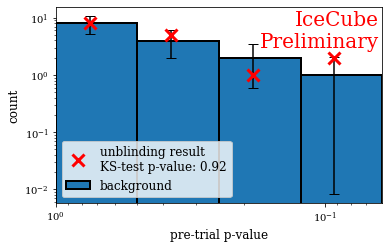

In [83]:
flat_pval_dist = collected_res.to_numpy().flatten()
flat_res = np.array(res.to_numpy()[:,1:].flatten(), dtype='float')
nan_mask = ~np.isnan(flat_res)
flat_res = flat_res[nan_mask]

ks_test_pval = scipy.stats.ks_2samp(flat_res, flat_pval_dist).pvalue

zero_mask = flat_pval_dist <= 0 
bins = np.logspace(np.log10(min(flat_res)), np.log10(1), 5)
bin_mids = (bins[1:] + bins[:-1]) / 2
width = bins[1:] - bins[:-1]

pval_hist, bins = np.histogram(flat_pval_dist, bins=bins)
pval_hist_norm = pval_hist / len(collected_res)
pois_err = np.sqrt(pval_hist_norm)
res_hist, _ = np.histogram(flat_res, bins=bins)

fig, ax = plt.subplots(figsize=figsize)
ax.bar(bin_mids, pval_hist_norm, edgecolor='k', width=width, yerr=pois_err, capsize=5, lw=2, label='background')
ax.plot(bin_mids, res_hist, ls='', marker='x', color='red', ms=12, mew=3, label=f'unblinding result \nKS-test p-value: {ks_test_pval:.2f}')
xlim = (max(bins), min(bins))
ax.set_xlim(xlim)
ax.grid(False)
ax.legend(loc='lower left', fontsize=legend_fs)
ax.tick_params(axis='x', labelsize=axis_ticks_fs)
ax.tick_params(axis='y', labelsize=axis_ticks_fs)
ax.set_xlabel('pre-trial p-value', fontsize=axis_label_fs)
ax.set_ylabel('count', fontsize=axis_label_fs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.annotate(preliminary_txt, color=preliminary_color, fontsize=preliminary_fs,
            xy=(0.99, 0.98), xycoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')

filename = os.path.join(unblind_ccsn_plot_dir, "p_value_distribution_kstest.pdf")
d = os.path.dirname(filename)
if not os.path.isdir(d):
    os.makedirs(d)
logger.info(f"saving under {filename}")
fig.savefig(filename)

plt.show()
plt.close()

### Plotting the total emitted energy equivalent

DEBUG:main:IIn
<ipython-input-84-f5113709479a>:37: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(x, y, yerr=np.array(y)*1e-1, uplims=4,
DEBUG:main:IIP
DEBUG:main:Ibc
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/limits/decay_gamma2.00.pdf


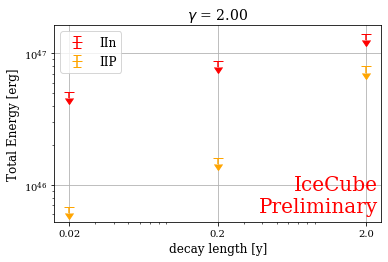

DEBUG:main:IIn
<ipython-input-84-f5113709479a>:37: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(x, y, yerr=np.array(y)*1e-1, uplims=4,
DEBUG:main:IIP
DEBUG:main:Ibc
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/limits/box_gamma2.00.pdf


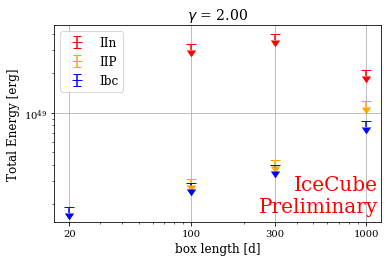

DEBUG:main:IIn
<ipython-input-84-f5113709479a>:37: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(x, y, yerr=np.array(y)*1e-1, uplims=4,
DEBUG:main:IIP
DEBUG:main:Ibc
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/limits/decay_gamma2.50.pdf


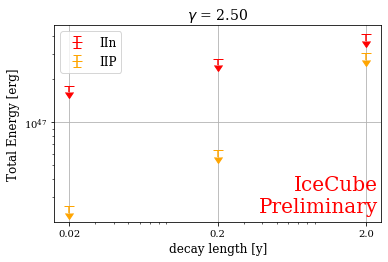

DEBUG:main:IIn
<ipython-input-84-f5113709479a>:37: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.errorbar(x, y, yerr=np.array(y)*1e-1, uplims=4,
DEBUG:main:IIP
DEBUG:main:Ibc
INFO:main:saving under /afs/ifh.de/user/n/neckerja/scratch/fs_dev_branch/flarestack__data/output/plots/analyses/ccsn/necker_2019/unblind_ccsn_box_time/limits/box_gamma2.50.pdf


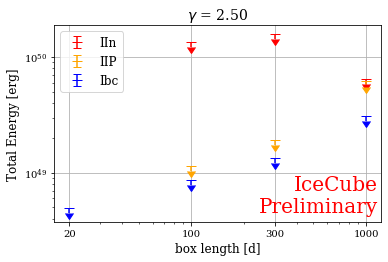

In [84]:
for gamma in [2, 2.5]:

    for pdf_type in ['decay', 'box']:

        fig, ax = plt.subplots(figsize=figsize)

        for cat in sn_cats:
            logger.debug(cat)
            
            try:
                llh_times = sn_time_pdfs(cat, pdf_type=pdf_type)
            except KeyError:
                continue
            
            name = f'{name_root}/{pdf_type}/{cat}'

            x = list()
            y = list()

            for llh_time in llh_times:
                time = llh_time['decay_time'] if 'decay' in pdf_type else \
                    llh_time['pre_window'] + llh_time['post_window']
                full_name = f'{name}/{time}/'

                limit_path = limit_output_path(full_name + "real_unblind/")
                with open(limit_path, 'rb') as f:
                    limits = pickle.load(f)

                ind = np.array(limits['gamma']) == gamma
                y.append(np.array(limits['energy'])[ind])

                if pdf_type == 'box':
                    x.append(time)
                else:
                    x.append(time / 364.25)

            ax.errorbar(x, y, yerr=np.array(y)*1e-1, uplims=4, 
                        color=get_sn_color(cat), ls='', capsize=4, label=cat, marker='_', markersize=10)
            
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.tick_params(axis='x', labelsize=axis_ticks_fs)
        ax.tick_params(axis='y', labelsize=axis_ticks_fs)
        ax.legend(fontsize=legend_fs)
        ax.grid()
        
        unit = "y" if pdf_type == 'decay' else "d"
        ax.set_xlabel(f"{pdf_type} length [{unit}]", fontsize=axis_label_fs)
        ax.set_ylabel("Total Energy [erg]", fontsize=axis_label_fs)
        ax.set_title(f"$\gamma$ = {gamma:.2f}", fontsize=title_fs)
        ax.annotate(preliminary_txt,
                    color=preliminary_color, 
                    fontsize=preliminary_fs,
                    xy=(0.99, 0.03), xycoords='axes fraction',
                    horizontalalignment='right', verticalalignment='bottom')
        
        filename = os.path.join(unblind_ccsn_plot_dir, "limits", f"{pdf_type}_gamma{gamma:.2f}.pdf")
        d = os.path.dirname(filename)
        if not os.path.isdir(d):
            os.makedirs(d)
            
        logger.info(f"saving under {filename}")
        fig.savefig(filename)
        
        plt.show()
        plt.close()

### Plot limits on contribution to diffuse flux 

In [14]:
z = 8  # redshift integration

In [15]:
def plot_diffuse_flux_measurement(axes, **kwargs):
    fit = kwargs.get('fit', 'joint_15')
    contour = kwargs.get('contour', '95')
    color = kwargs.get('color', 'k')
    label = kwargs.get('label', fit)
    best_f, upper_f, lower_f, e_range = get_diffuse_flux_contour(fit=fit, contour_name=contour)
    logging.debug('plotting diffuse flux measurement')
    patch = axes.fill_between(e_range,
                              y1=lower_f(e_range) * e_range ** 2,
                              y2=upper_f(e_range) * e_range ** 2,
                              label=f"{contour}% contour" if label else '', color=color, alpha=0.5)
    line = axes.plot(e_range, best_f(e_range) * e_range ** 2, label=f'{label} best fit' if label else '', color=color)
    return axes, patch, line

INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:root:plotting diffuse flux measurement
DEBUG:main:energy is 1.9073029847066887e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 2.891499329202462e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https

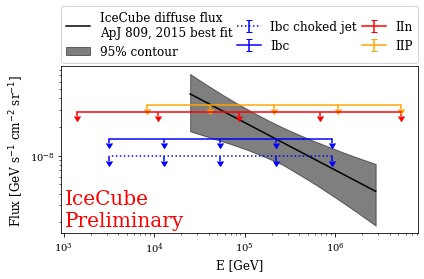

INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:root:plotting diffuse flux measurement
DEBUG:main:energy is 4.988370517162677e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.


                perc_100TeV  perc_1GeV
Ibc choked jet     0.442590   0.001400
Ibc                0.670973   0.002122
IIn                1.298867   0.004107
IIP                1.541615   0.004875


INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 8.71660662382444e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 6.444407189154035e+49
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.or

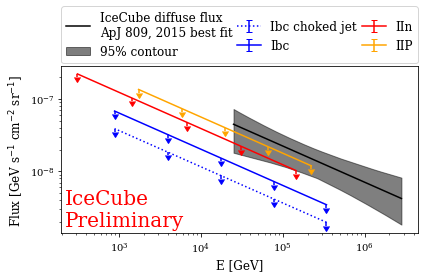

                perc_100TeV  perc_1GeV
Ibc choked jet     0.163574   0.163574
Ibc                0.285827   0.285827
IIn                0.552017   0.552017
IIP                0.796090   0.796090


In [87]:
for gamma in [2, 2.5]:
    energy_dict = {
        'Ibc choked jet': f'{name_root}/box/Ibc/20',
        'Ibc': f'{name_root}/box/Ibc/100',
        'IIn': f'{name_root}/box/IIn/1000',
        'IIP': f'{name_root}/box/IIP/100'
    }

    with open(energy_range_filename, "rb") as f:
        e_range = pickle.load(f)

    e_range_dict = {
        'Ibc': e_range[gamma]['box']['Ibc'],
        'IIn': e_range[gamma]['box']['IIn'],
        'IIP': e_range[gamma]['box']['IIP']
    }

    fig, ax = plt.subplots()

    ax, p, l = plot_diffuse_flux_measurement(
        ax, 
        label="IceCube diffuse flux \nApJ 809, 2015", 
        fit='joint_15'
    )
#     ax, p, l = plot_diffuse_flux_measurement(ax, label="Northern Tracks '19", fit='northern_tracks_19', color='grey')
    
    contrib = pd.DataFrame()
    for icat, pat in energy_dict.items():

        cat = icat if 'Ibc' not in icat else 'Ibc'
        
        limit_path = limit_output_path(pat + "/real_unblind/")
        with open(limit_path, 'rb') as f:
            limits = pickle.load(f)

        ind = np.array(limits['gamma']) == gamma
        energy = float(np.array(limits['energy'])[ind])
        
        logger.debug(f"energy is {energy}")

        energy_range_gev = np.logspace(np.log10(e_range_dict[cat][0]), np.log10(e_range_dict[cat][1]), 5)
#        energy_kwargs = {'e_min_gev': min(energy_range_gev), 'e_max_gev': max(energy_range_gev)}
        pop_flux = get_population_flux(energy * u.erg, get_ccsn_rate_type_function(cat), gamma, z)
        flux_time_esquared = pop_flux * energy_range_gev ** (-1 * gamma + 2) # * energy_range_gev ** 2
        perc = pop_flux * 1e5 ** (-1 * gamma) / get_diffuse_flux_at_100TeV()[0]
        perc_1GeV = pop_flux / get_diffuse_flux_at_1GeV()[0]
        
        contrib = contrib.append(
            pd.DataFrame([[perc.value, perc_1GeV.value]], columns=['perc_100TeV', 'perc_1GeV'], index=[icat])
        )

        ls = '-' if 'choked jet' not in icat else ':'
        ax.errorbar(energy_range_gev, flux_time_esquared.value, yerr=.1* flux_time_esquared.value, 
                    uplims=True, color=get_sn_color(cat), 
#                     label=f"{icat}: {perc*100:.2f}% @100 TeV", 
                    label=icat,
                    ls=ls)

#     ax.legend(fontsize=legend_fs, ncol=3)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=3, 
               mode='expand', fontsize=legend_fs, borderaxespad=0.)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('E [GeV]', fontsize=axis_label_fs)
    ax.set_ylabel('Flux [GeV s$^{-1}$ cm$^{-2}$ sr$^{-1}$]', fontsize=axis_label_fs)
    ax.tick_params(axis='x', labelsize=axis_ticks_fs)
    ax.tick_params(axis='y', labelsize=axis_ticks_fs)
    ax.annotate(preliminary_txt, color=preliminary_color, fontsize=preliminary_fs,
                xy=(0.01, 0.02), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='bottom')
    fig.tight_layout()
#     xlim_high = ax.get_xlim()[-1]
#     ax.set_xlim((1e2, xlim_high))

    filename = os.path.join(unblind_ccsn_plot_dir, "limits", f"contrib_diffuse_flux_gamma{gamma:.2f}.pdf")
    d = os.path.dirname(filename)
    if not os.path.isdir(d):
        os.makedirs(d)

    logger.info(f"saving under {filename}")
    fig.savefig(filename)

    plt.show()
    plt.close()
    
    print(contrib)

INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:root:plotting diffuse flux measurement
DEBUG:main:energy is 1.9073029847066887e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 2.891499329202462e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https

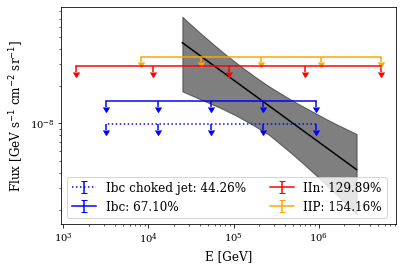

INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:root:plotting diffuse flux measurement
DEBUG:main:energy is 4.988370517162677e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.


                perc_100TeV  perc_1GeV
Ibc choked jet     0.442590   0.001400
Ibc                0.670973   0.002122
IIn                1.298867   0.004107
IIP                1.541615   0.004875


INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 8.71660662382444e+48
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded rate 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:Loaded kcc 'strolger_15' (https://arxiv.org/abs/1509.06574)
INFO:root:No specified sn_subclass_fractions_name. Assuming default.
INFO:root:Loaded SN subclass fractions 'li_11' (https://arxiv.org/abs/1006.4612)
INFO:root:Subclass 'Ibc' is equal to 24.50% of the CCSN rate.
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
INFO:flarestack.cosmo.icecube_diffuse_flux:Loaded contour 'joint_15' from https://arxiv.org/abs/1507.03991
DEBUG:main:energy is 6.444407189154035e+49
INFO:root:Loaded evolution 'strolger_15' (https://arxiv.or

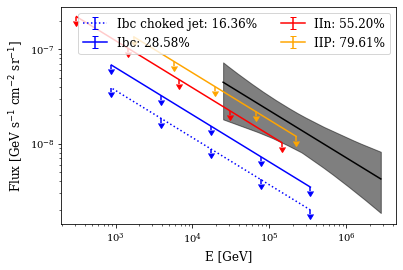

                perc_100TeV  perc_1GeV
Ibc choked jet     0.163574   0.163574
Ibc                0.285827   0.285827
IIn                0.552017   0.552017
IIP                0.796090   0.796090


In [20]:
for gamma in [2, 2.5]:
    energy_dict = {
        'Ibc choked jet': f'{name_root}/box/Ibc/20',
        'Ibc': f'{name_root}/box/Ibc/100',
        'IIn': f'{name_root}/box/IIn/1000',
        'IIP': f'{name_root}/box/IIP/100'
    }

    with open(energy_range_filename, "rb") as f:
        e_range = pickle.load(f)

    e_range_dict = {
        'Ibc': e_range[gamma]['box']['Ibc'],
        'IIn': e_range[gamma]['box']['IIn'],
        'IIP': e_range[gamma]['box']['IIP']
    }

    fig, ax = plt.subplots()

    ax, p, l = plot_diffuse_flux_measurement(ax, label="", fit='joint_15')
#     ax, p, l = plot_diffuse_flux_measurement(ax, label="Northern Tracks '19", fit='northern_tracks_19', color='grey')
    
    contrib = pd.DataFrame()
    for icat, pat in energy_dict.items():

        cat = icat if 'Ibc' not in icat else 'Ibc'
        
        limit_path = limit_output_path(pat + "/real_unblind/")
        with open(limit_path, 'rb') as f:
            limits = pickle.load(f)

        ind = np.array(limits['gamma']) == gamma
        energy = float(np.array(limits['energy'])[ind])
        
        logger.debug(f"energy is {energy}")

        energy_range_gev = np.logspace(np.log10(e_range_dict[cat][0]), np.log10(e_range_dict[cat][1]), 5)
#        energy_kwargs = {'e_min_gev': min(energy_range_gev), 'e_max_gev': max(energy_range_gev)}
        pop_flux = get_population_flux(energy * u.erg, get_ccsn_rate_type_function(cat), gamma, z)
        flux_time_esquared = pop_flux * energy_range_gev ** (-1 * gamma + 2) # * energy_range_gev ** 2
        perc = pop_flux * 1e5 ** (-1 * gamma) / get_diffuse_flux_at_100TeV()[0]
        perc_1GeV = pop_flux / get_diffuse_flux_at_1GeV()[0]
        
        contrib = contrib.append(
            pd.DataFrame([[perc.value, perc_1GeV.value]], columns=['perc_100TeV', 'perc_1GeV'], index=[icat])
        )

        ls = '-' if 'choked jet' not in icat else ':'
        ax.errorbar(energy_range_gev, flux_time_esquared.value, yerr=.1* flux_time_esquared.value, 
                    uplims=True, color=get_sn_color(cat), 
                    label=f"{icat}: {perc.value*100:.2f}%", 
#                     label=icat,
                    ls=ls)

    ax.legend(fontsize=legend_fs, ncol=2)
#     plt.legend(bbox_to_anchor=(1.02, 0., 1., .302), loc='lower left', 
#                mode='expand', 
#                fontsize=legend_fs, borderaxespad=0.)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('E [GeV]', fontsize=axis_label_fs)
    ax.set_ylabel('Flux [GeV s$^{-1}$ cm$^{-2}$ sr$^{-1}$]', fontsize=axis_label_fs)
    ax.tick_params(axis='x', labelsize=axis_ticks_fs)
    ax.tick_params(axis='y', labelsize=axis_ticks_fs)
#     fig.tight_layout()
#     xlim_high = ax.get_xlim()[-1]
#     ax.set_xlim((1e2, xlim_high))

    filename = os.path.join(unblind_ccsn_plot_dir, "limits", f"contrib_diffuse_flux_gamma{gamma:.2f}_withperc.pdf")
    d = os.path.dirname(filename)
    if not os.path.isdir(d):
        os.makedirs(d)

    logger.info(f"saving under {filename}")
    fig.savefig(filename)

    plt.show()
    plt.close()
    
    print(contrib)